In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import MarkerCluster

# 데이터 불러오기
data = pd.read_csv("/Users/choijaehyeok/Desktop/KB_data/fraudTrain.csv")
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [2]:
use_data = data.iloc[:, 11:]
use_data.head()

state    zip      lat      long  city_pop  \
0    NC  28654  36.0788  -81.1781      3495   
1    WA  99160  48.8878 -118.2105       149   
2    ID  83252  42.1808 -112.2620      4154   
3    MT  59632  46.2306 -112.1138      1939   
4    VA  24433  38.4207  -79.4629        99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
use_data.dtypes

state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [4]:
use_data.isna().sum().sum()

0

### job 종류 확인

In [5]:
count = use_data['job'].value_counts().reset_index()
count.columns = ['job', 'n']
count

job     n
0             Film/video editor  9779
1           Exhibition designer  9199
2               Naval architect  8684
3      Surveyor, land/geomatics  8680
4            Materials engineer  8270
..                          ...   ...
489         Information officer     8
490          Veterinary surgeon     8
491                 Ship broker     7
492  Contracting civil engineer     7
493           Warehouse manager     7

[494 rows x 2 columns]

### state열 확인

In [6]:
use_data['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

### city_pop에 따른 state별 빈도

In [7]:
state_city_pop = use_data.groupby(['state', 'city_pop']).size().reset_index(name='n').sort_values(by='n', ascending=False)
state_city_pop.head()

state  city_pop     n
824    TX   1595797  5130
51     AZ   1312922  5075
825    TX   2906700  4168
136    FL    276002  4155
242    IN    910148  4073

### is_fraud 데이터 필터링

In [8]:
fraud = use_data[use_data['is_fraud'] == 1][['state', 'merch_lat', 'merch_long', 'is_fraud']]

### 구글맵 시각화

In [11]:
import folium

# 미국 중심 좌표
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# MarkerCluster를 사용하여 시각화
marker_cluster = MarkerCluster().add_to(m)

for idx, row in fraud.iterrows():
    folium.Marker([row['merch_lat'], row['merch_long']], popup=row['state']).add_to(marker_cluster)


m

### 주별 사기 건수

/var/folders/yf/wms8k19x6j34yjf_wz1hy8bh0000gn/T/ipykernel_39356/2737867984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='n', data=fraud_count, palette='viridis')


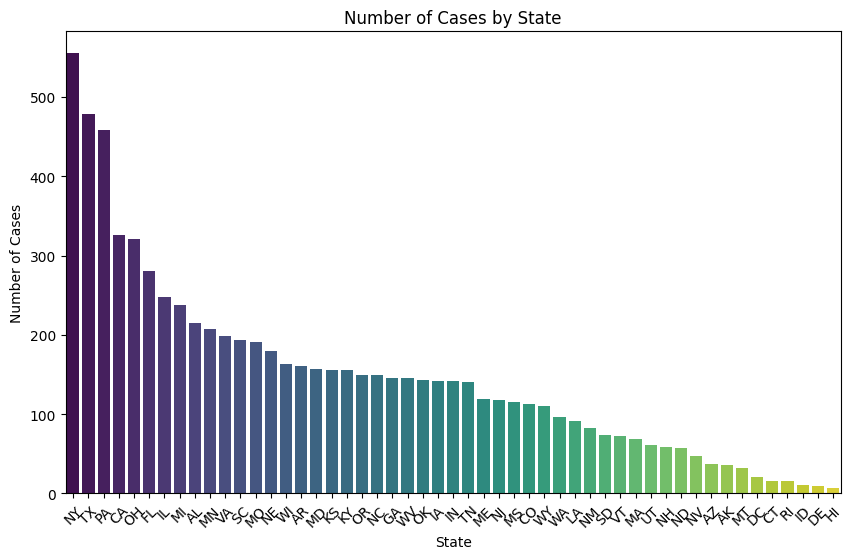

In [12]:
fraud_count = fraud['state'].value_counts().reset_index()
fraud_count.columns = ['state', 'n']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='n', data=fraud_count, palette='viridis')
plt.xticks(rotation=45)
plt.title("Number of Cases by State")
plt.xlabel("State")
plt.ylabel("Number of Cases")
plt.show()

### dob별 사기 건수

/var/folders/yf/wms8k19x6j34yjf_wz1hy8bh0000gn/T/ipykernel_39356/1253927209.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='decade', y='fraud_count', data=fraud_by_decade, palette='viridis')


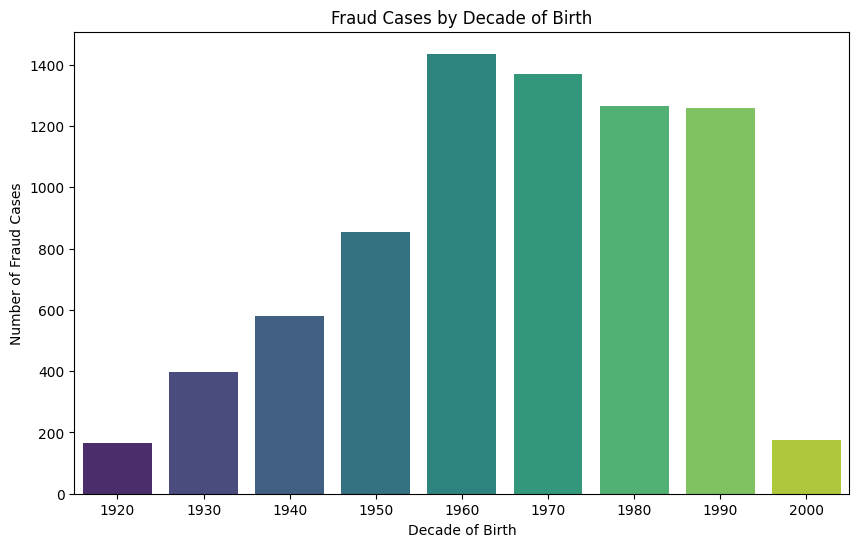

In [13]:
use_data['dob'] = pd.to_datetime(use_data['dob'], errors='coerce')
use_data['year'] = use_data['dob'].dt.year
use_data['decade'] = (use_data['year'] // 10) * 10

fraud_by_decade = use_data[use_data['is_fraud'] == 1].groupby('decade').size().reset_index(name='fraud_count')

# 결과 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='fraud_count', data=fraud_by_decade, palette='viridis')
plt.title("Fraud Cases by Decade of Birth")
plt.xlabel("Decade of Birth")
plt.ylabel("Number of Fraud Cases")
plt.show()

### 주별 인구수와 사기 비율

/var/folders/yf/wms8k19x6j34yjf_wz1hy8bh0000gn/T/ipykernel_39356/2210137505.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='fraud_rate', data=state_fraud.sort_values(by='fraud_rate', ascending=False), palette='viridis')


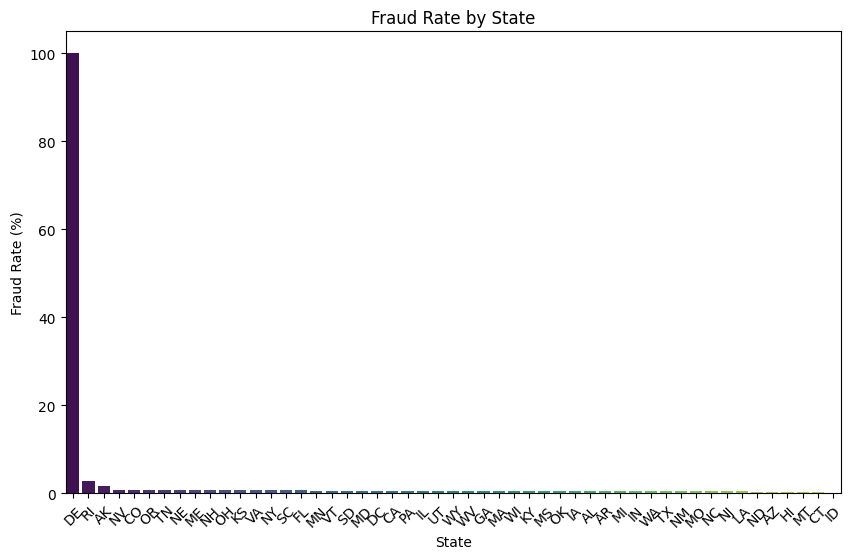

/var/folders/yf/wms8k19x6j34yjf_wz1hy8bh0000gn/T/ipykernel_39356/2210137505.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='fraud_per_capita', data=state_fraud.sort_values(by='fraud_per_capita', ascending=False), palette='viridis')


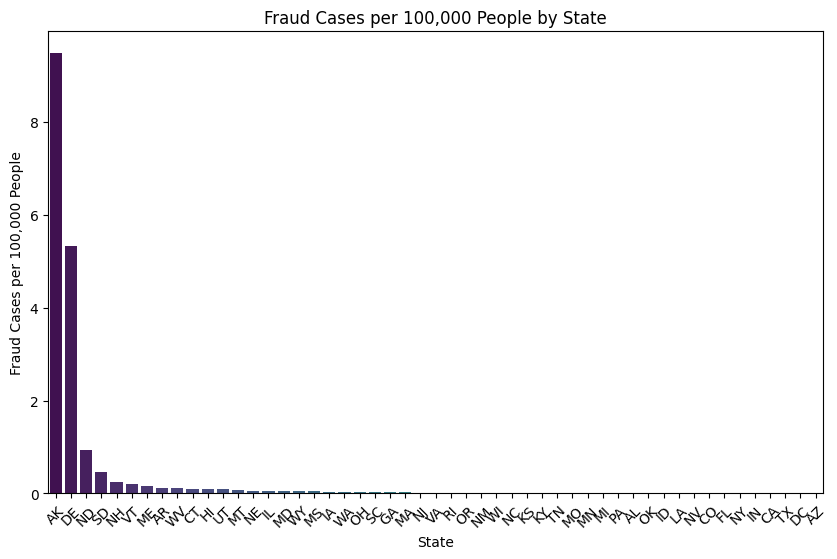

In [14]:
state_population = use_data.groupby('state')['city_pop'].sum().reset_index(name='total_population')

state_fraud = use_data.groupby('state').agg(fraud_count=('is_fraud', 'sum'), total_transactions=('is_fraud', 'count')).reset_index()
state_fraud = state_fraud.merge(state_population, on='state')
state_fraud['fraud_rate'] = (state_fraud['fraud_count'] / state_fraud['total_transactions']) * 100
state_fraud['fraud_per_capita'] = (state_fraud['fraud_count'] / state_fraud['total_population']) * 100000

# 사기율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='fraud_rate', data=state_fraud.sort_values(by='fraud_rate', ascending=False), palette='viridis')
plt.xticks(rotation=45)
plt.title("Fraud Rate by State")
plt.xlabel("State")
plt.ylabel("Fraud Rate (%)")
plt.show()

# 인구당 사기 건수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='fraud_per_capita', data=state_fraud.sort_values(by='fraud_per_capita', ascending=False), palette='viridis')
plt.xticks(rotation=45)
plt.title("Fraud Cases per 100,000 People by State")
plt.xlabel("State")
plt.ylabel("Fraud Cases per 100,000 People")
plt.show()

### Unix_time을 사용한 시간대별 사기 건수

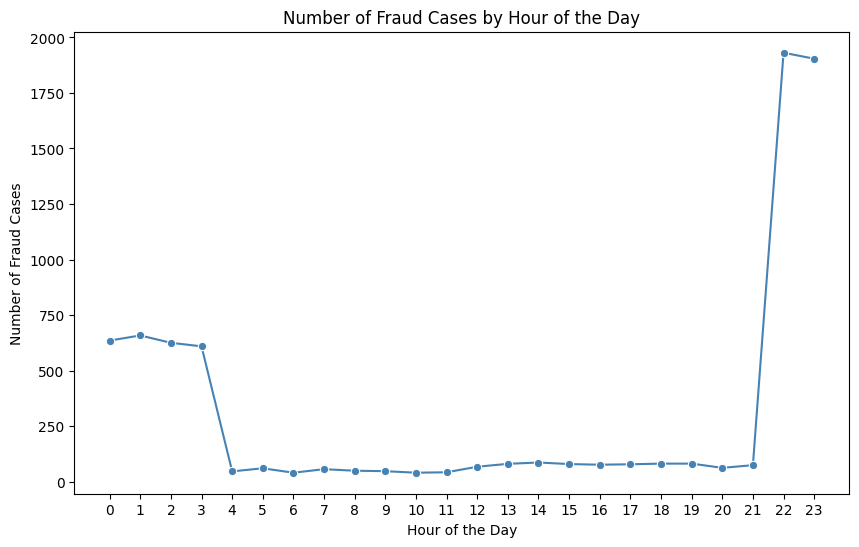

In [15]:
use_data['datetime'] = pd.to_datetime(use_data['unix_time'], unit='s')
use_data['hour'] = use_data['datetime'].dt.hour

fraud_by_hour = use_data[use_data['is_fraud'] == 1].groupby('hour').size().reset_index(name='fraud_count')

# 결과 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='fraud_count', data=fraud_by_hour, marker='o', color='steelblue')
plt.title("Number of Fraud Cases by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Fraud Cases")
plt.xticks(range(24))
plt.show()